<a href="https://colab.research.google.com/github/LeratoMatlala1/Project2/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Car Insurance Data**

**Source**: Kaggle

**Description of data:**
      
  This dataset represents annual car insurance data shared by a company, providing insights into real customer behaviors. The dataset includes 19 features, 18 of which are derived from practical world scenarios and logged by the company, and 10000 observations. The outcome column indicates whether a customer has claimed from insurance, with a value of 1 indicating a claim and 0 indicating no claim.

   Each row contains information about a specific person, including their age group, gender, education level, socioeconomic status, various numeric attributes, and details related to their interaction with car insurance, such as claim history and vehicle type.

   In this dataset, where the outcome column indicates whether a customer has claimed their car insurance (with values of 1 for claimed and 0 for not claimed), it is a classification problem. The task is to classify customers into two categories: those who have made an insurance claim and those who haven't.

##Data Load

In [495]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import set_config


#Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#Modelling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (roc_auc_score, ConfusionMatrixDisplay,confusion_matrix,
                             PrecisionRecallDisplay, RocCurveDisplay,
                             f1_score, accuracy_score, precision_score,
                             recall_score, classification_report)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

set_config(transform_output='pandas')

In [496]:
#import the data
CI_path = '/content/drive/MyDrive/Coding Dojo/Machine Learning/Project/Car_Insurance_Claim.csv'
CI_df = pd.read_csv(CI_path)

pd.set_option('display.max_column', None)
CI_df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [497]:
CI_df.shape

(10000, 19)

## Initial Inspection

In [498]:
#check data types
CI_df.dtypes

ID                       int64
AGE                     object
GENDER                  object
RACE                    object
DRIVING_EXPERIENCE      object
EDUCATION               object
INCOME                  object
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP      float64
VEHICLE_YEAR            object
MARRIED                float64
CHILDREN               float64
POSTAL_CODE              int64
ANNUAL_MILEAGE         float64
VEHICLE_TYPE            object
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                float64
dtype: object

## Data Cleaning

### Removing Unnecessary Columns

We are removing the "ID" and "POSTAL_CODE" columns as they are not necessary for the classification task and do not provide meaningful information for the model. This will simplify the dataset and improve the efficiency of our classification algorithm.


In [499]:
# remove unnecessary columns
CI_df.drop(columns=['ID','POSTAL_CODE'], inplace=True)
CI_df.columns

Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE', 'SPEEDING_VIOLATIONS',
       'DUIS', 'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')

### Fixing Inconsistent Categories

Fixing inconsistent categories in the dataset to ensure data uniformity and accuracy. Inconsistent categories can arise due to various reasons, such as data entry errors, variations in naming conventions, or changes in category definitions over time.


In [500]:
CatColumns = CI_df.select_dtypes(object).columns
for i in CatColumns:
    print(f'Value counts for {i}')
    print(CI_df[i].value_counts())
    print('\n')

Value counts for AGE
26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: AGE, dtype: int64


Value counts for GENDER
female    5010
male      4990
Name: GENDER, dtype: int64


Value counts for RACE
majority    9012
minority     988
Name: RACE, dtype: int64


Value counts for DRIVING_EXPERIENCE
0-9y      3530
10-19y    3299
20-29y    2119
30y+      1052
Name: DRIVING_EXPERIENCE, dtype: int64


Value counts for EDUCATION
high school    4157
university     3928
none           1915
Name: EDUCATION, dtype: int64


Value counts for INCOME
upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: INCOME, dtype: int64


Value counts for VEHICLE_YEAR
before 2015    6967
after 2015     3033
Name: VEHICLE_YEAR, dtype: int64


Value counts for VEHICLE_TYPE
sedan         9523
sports car     477
Name: VEHICLE_TYPE, dtype: int64




There are no clear and glaring inconsistencies or issues with the category labels. The categories seem well-defined and consistent within each variable.

### Check Outliers

In [501]:
CI_df.describe()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,9018.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,0.515813,0.697000,0.498200,0.688800,11697.003207,1.482900,0.23920,1.056300,0.313300
std,0.137688,0.459578,0.500022,0.463008,2818.434528,2.241966,0.55499,1.652454,0.463858
min,0.053358,0.000000,0.000000,0.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,0.417191,0.000000,0.000000,0.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,0.525033,1.000000,0.000000,1.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,0.618312,1.000000,1.000000,1.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,0.960819,1.000000,1.000000,1.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


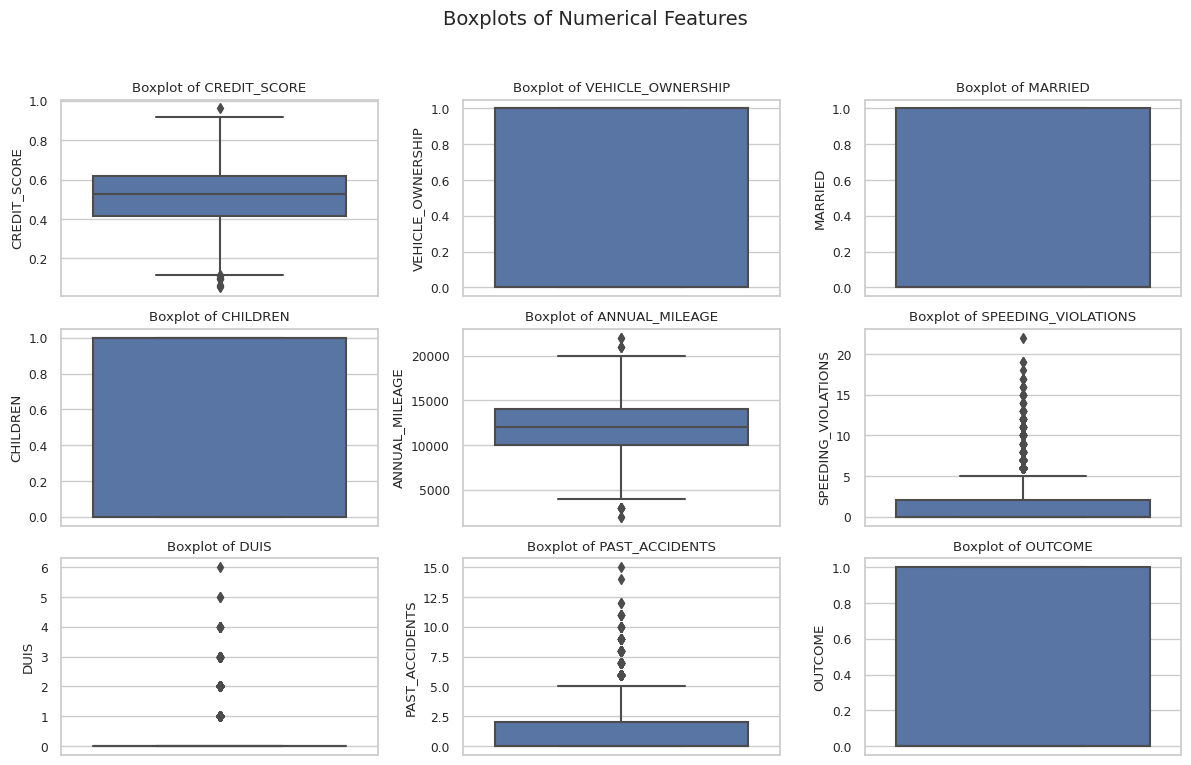

In [502]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
numerical_features = CI_df.select_dtypes(include=['number'])
# Plotting boxplots for each numerical feature on its own subplot using Seaborn
for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    sns.boxplot(data=CI_df, y=feature, ax=axes[row, col])
    axes[row, col].set_title(f"Boxplot of {feature}")

plt.suptitle("Boxplots of Numerical Features", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]);


- There are possible outliers in Annual Mileage. The minimum value is 2000, and the maximum value is 22000. This range is relatively large, which could indicate outliers.
- The maximum value in Speeding Violations is 22, which is substantially higher than the third quartile (Q3) value of 2. This indicates the presence of potential outliers
- The maximum value in DUIS is 6, significantly higher than the third quartile (Q3) value of 0. This also suggests the presence of potential outliers.
- The maximum value IN Past Accidents is 15, much higher than the third quartile (Q3) value of 2, indicating potential outliers.

### Removing Unnecessary Rows

Removing duplicate rows to ensure data integrity and prevent bias in our analysis. Duplicate rows can skew statistical measures and machine learning models by giving undue importance to certain data points. By eliminating duplicates, we maintain a cleaner and more representative dataset for our analysis.


In [503]:
#Check if there are there duplicates
CI_df.duplicated().sum()

20

In [504]:
# Remove duplicates
CI_df = CI_df.drop_duplicates()
CI_df.duplicated().sum()

0

### Handling Missing Values

In [505]:
#Make a copy of the dataframe that will be used for classification
CI_df_ml = CI_df.copy()
CI_df_ml.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,12000.0,sedan,0,0,0,0.0
1,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,16000.0,sedan,0,0,0,1.0
2,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,11000.0,sedan,0,0,0,0.0
3,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,11000.0,sedan,0,0,0,0.0
4,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,12000.0,sedan,2,0,1,1.0


Handling missing values to ensure the completeness and accuracy of our data.
Missing values can introduce bias and lead to incorrect conclusions in our analysis. We are addressing them by either imputing them with appropriate values or by excluding rows or columns with excessive missing data, depending on the nature and significance of the missing values for our specific analysis.


In [506]:
#Identify missing values
CI_df.isna().sum()

AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           962
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
ANNUAL_MILEAGE         952
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

Missing values in Credit Score could imply that the person is young or has not yet built up a credit score. Therefore it is safe to fill these missing values with zeros.

Missing values in Annual Mileage Some could be due to incomplete data entry or administrative errors. In such cases, we will impute missing values with the mean annual mileage for records with similar characteristics (e.g., the same vehicle type and vehicle year).


In [507]:
# Impute missing 'CREDIT_SCORE' with zero for policies with missing values
CI_df['CREDIT_SCORE'].fillna(0, inplace=True)

<ipython-input-507-e8f51e58246e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CI_df['CREDIT_SCORE'].fillna(0, inplace=True)


In [508]:
# Impute missing 'ANNUAL_MILEAGE' with mean based on similar policies
CI_df['ANNUAL_MILEAGE'].fillna(CI_df.groupby(['VEHICLE_TYPE', 'VEHICLE_YEAR'])['ANNUAL_MILEAGE'].transform('mean'), inplace=True)
CI_df.isna().sum()

<ipython-input-508-b1484e134f74>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CI_df['ANNUAL_MILEAGE'].fillna(CI_df.groupby(['VEHICLE_TYPE', 'VEHICLE_YEAR'])['ANNUAL_MILEAGE'].transform('mean'), inplace=True)


AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

##EDA

### Univariate Analysis


Univariate analysis provides essential insights into the nature of the data, which serve as a foundation for further exploration. It involves examining and analyzing each individual variable separately to gain insights into their characteristics and distributions

In [509]:
#Create a variable for all categorical features features
Categorical_features = CI_df.select_dtypes(include=['object']).columns
Categorical_features

Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object')

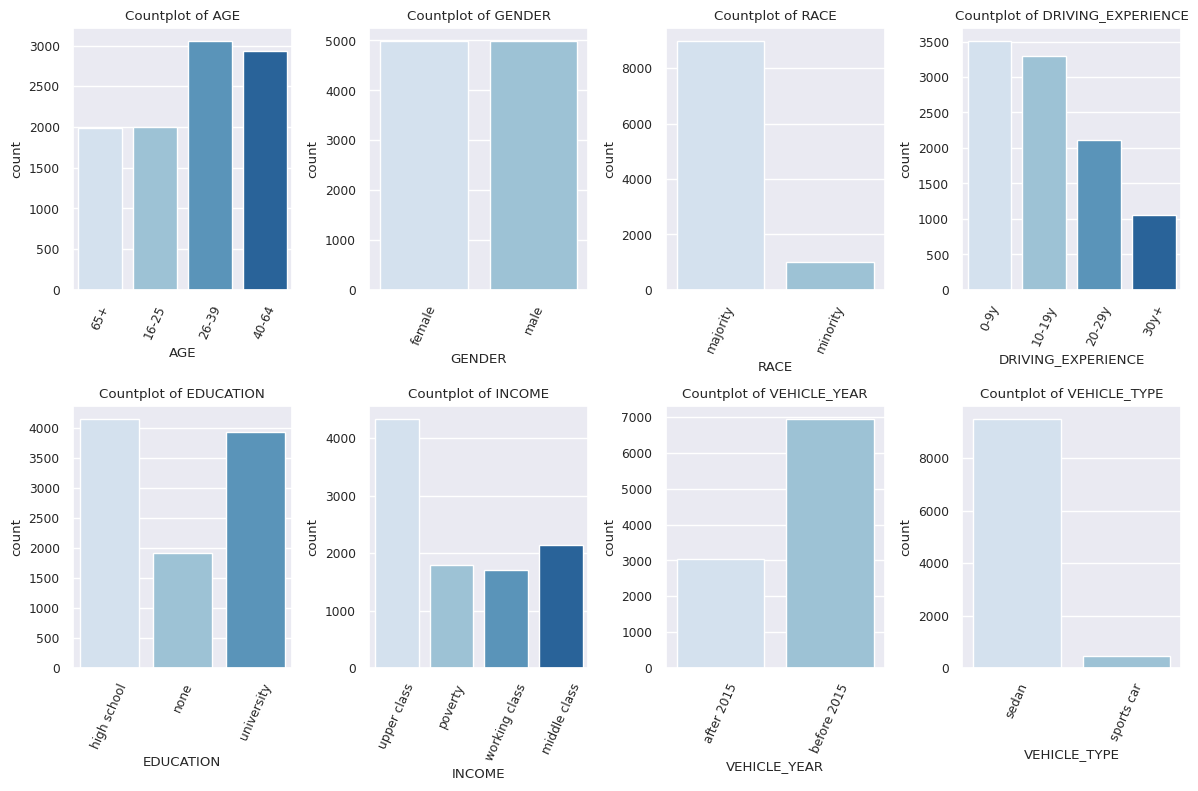

In [510]:
# Define a custom color palette
custom_palette = sns.color_palette("Blues", n_colors=4)

sns.set(font_scale=0.8)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 8))
for i, feature in enumerate(Categorical_features):
    row = i // 4
    col = i % 4
    sns.countplot(data=CI_df, x=feature, ax=axes[row, col], palette=custom_palette)
    axes[row, col].set_title(f"Countplot of {feature}")
    axes[row, col].tick_params(axis='x', rotation=66)

plt.tight_layout()
plt.show()

From the above we can note that:

- The majority of customers fall into the "26-39" and "40-64" age groups, with similar counts.
- There is a roughly equal distribution between "16-25" and "65+" age groups.
- The dataset is nearly balanced in terms of gender, with slightly more females (4998) than males (4982).
- The majority of customers belong to the "majority" race category, significantly outnumbering the "minority" category.
- The majority of vehicles are categorized as "before 2015," with significantly more customers falling into this category compared to "after 2015."

In [511]:
#Create a variable for all numerical features
numerical_features = CI_df.select_dtypes(include=['int64', 'float64']).columns
numerical_features

Index(['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS',
       'OUTCOME'],
      dtype='object')

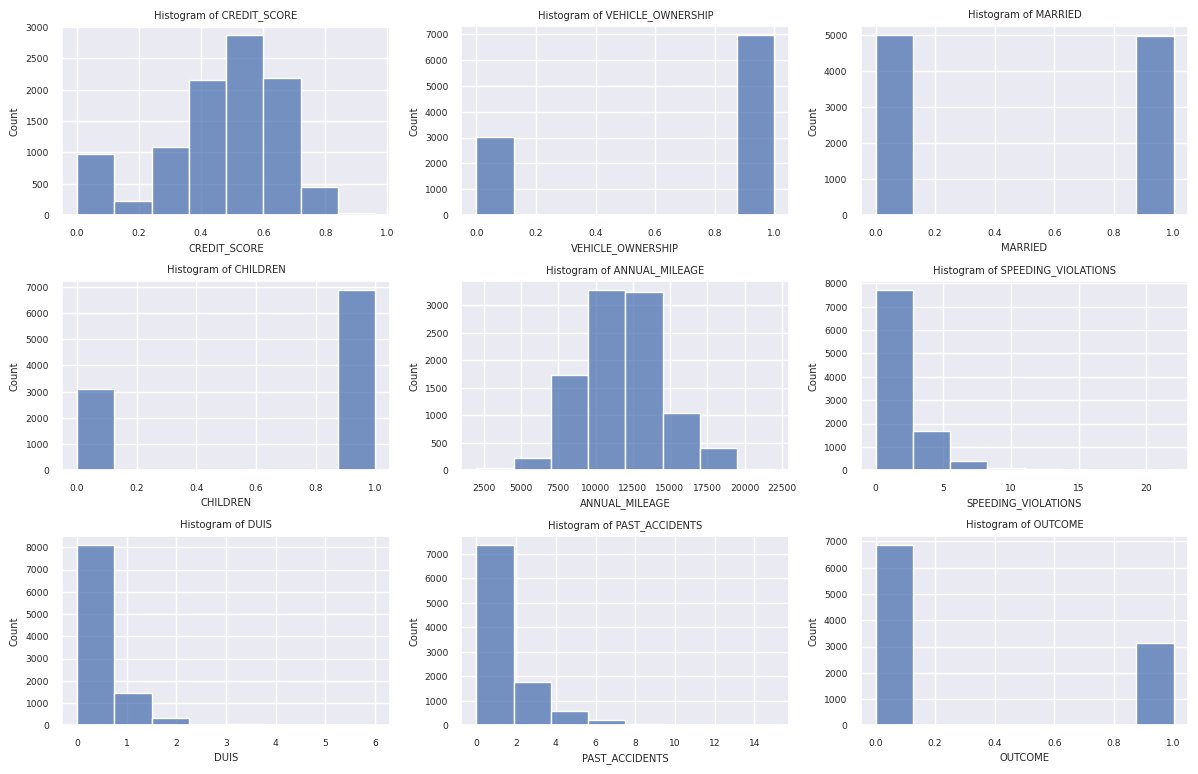

In [512]:
sns.set(font_scale=0.6)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))

for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    sns.histplot(data=CI_df, x=feature, bins=8, ax=axes[row, col])
    axes[row, col].set_title(f"Histogram of {feature}")
plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.show()

From the above, we can note that:

- The majority of customers (6964) own a vehicle, while a smaller portion (3016) do not own a vehicle.
- The dataset is almost evenly split between married (4980) and unmarried (5000) customers.
- Specific mileage values like 11,000, 12,000, and 13,000 appear more frequently in the data.
- There are 6862 customers with an outcome of 0 (not claimed) and 3118 policyholders with an outcome of 1 (claimed).

### Multivariate Analysis

Unlike univariate analysis, which focuses on a single variable at a time, multivariate analysis considers the interactions and dependencies between two or more variables. Multivariate analysis helps identify patterns, trends, and associations among variables.

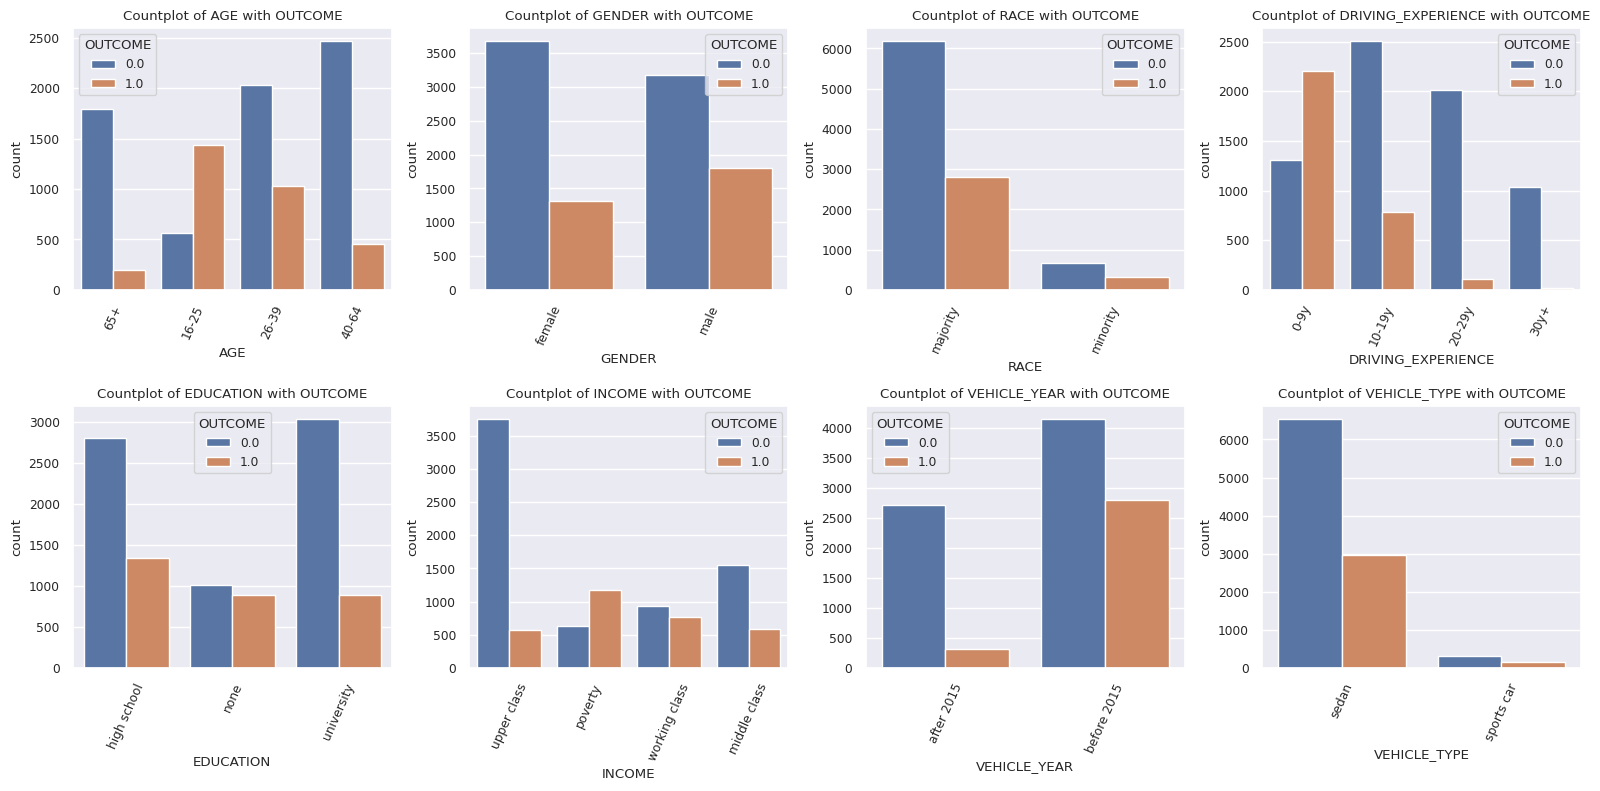

In [513]:
sns.set(font_scale=0.8)

nrows = 2
ncols = 4

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

for i, feature in enumerate(Categorical_features):
    row = i // ncols
    col = i % ncols
    sns.countplot(data=CI_df, hue='OUTCOME', x=feature, ax=axes[row, col])
    axes[row, col].set_title(f"Countplot of {feature} with OUTCOME")
    axes[row, col].tick_params(axis='x', rotation=66)

# Remove empty subplots
for i in range(len(Categorical_features), nrows * ncols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


<ipython-input-514-90ff87216fd1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = CI_df.corr()


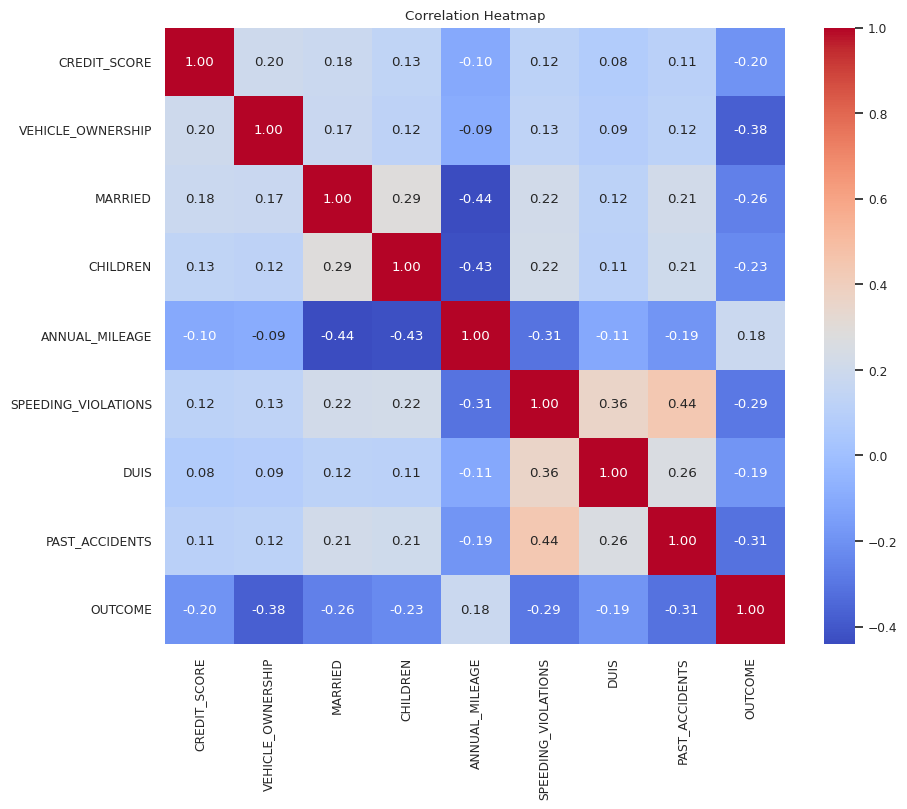

In [514]:
correlation_matrix = CI_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Some of the Key Insights from the above visuals are:

- The negative correlation (-0.2) between credit score and insurance claims suggests that individuals with higher credit scores are less likely to file insurance claims.
- The negative correlation (-0.26) between marital status and insurance claims suggests that married individuals are less likely to make insurance claims
- The positive correlation (0.18) between annual mileage and insurance claims indicates that individuals who drive more miles are slightly more likely to make insurance claims. Higher mileage might lead to an increased risk of accidents or incidents.
- These variables (speeding violations, DUIs, and past accidents) all have positive correlations with insurance claims. This suggests that individuals with a history of speeding violations, DUIs, or past accidents are more likely to file insurance claims
- There is a strong negative correlation (-0.44) between annual mileage and marital status ('MARRIED'). This suggests that married individuals tend to have lower annual mileage, which could be due to shared commuting or family-related travel.
- There is a strong positive correlation (0.36) between speeding violations and DUIs. This suggests that individuals with a history of speeding violations are more likely to have DUIs as well, indicating risky driving behavior.

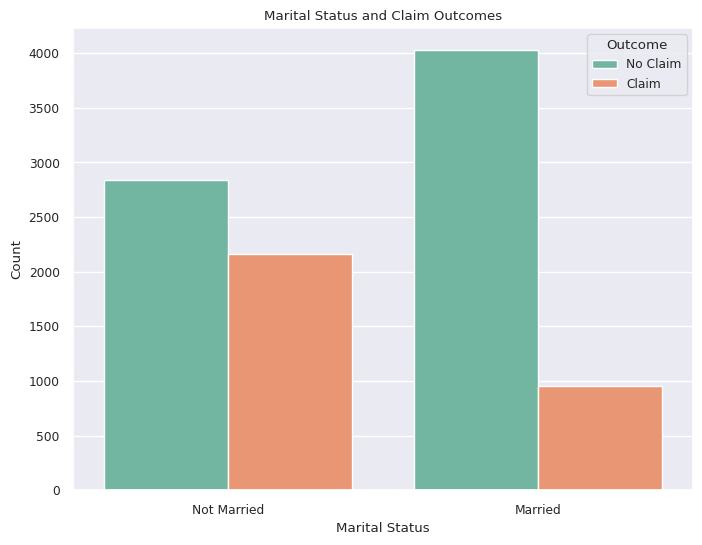

In [515]:
plt.figure(figsize=(8, 6))

sns.countplot(data=CI_df, x='MARRIED', hue='OUTCOME', palette="Set2")
plt.title("Marital Status and Claim Outcomes")
plt.xlabel("Marital Status")
plt.ylabel("Count")

plt.legend(title="Outcome", loc="upper right", labels=["No Claim", "Claim"])
plt.xticks(ticks=[0, 1], labels=["Not Married", "Married"])
plt.show()


The stacked bar chart illustrates the relationship between marital status and claim outcomes. It's evident that married individuals (represented as 'Married')  have fewer insurance claims compared to those who are not married. This means that marital status can be relevant in predicting insurance claim outcomes. Stakeholders may find this information useful when considering marital status as a risk factor in their insurance policies, potentially offering lower premiums or other benefits to married individuals based on their lower claim frequency.

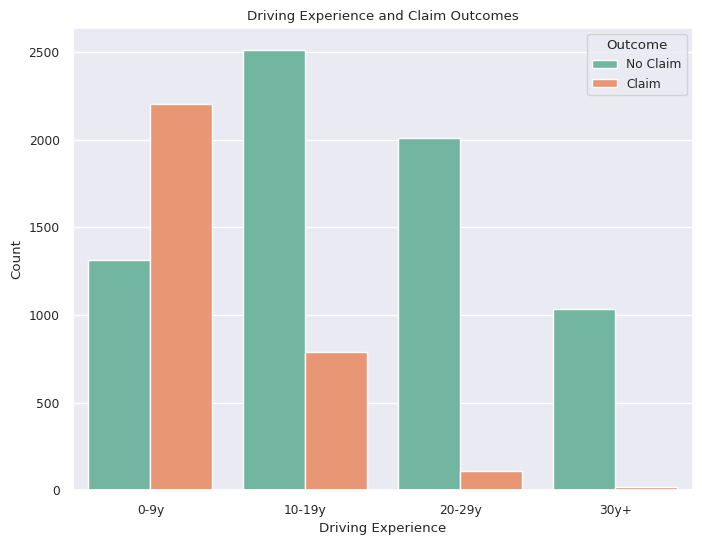

In [516]:
plt.figure(figsize=(8, 6))

sns.countplot(data=CI_df, x='DRIVING_EXPERIENCE', hue='OUTCOME', palette="Set2")
plt.title("Driving Experience and Claim Outcomes")
plt.xlabel("Driving Experience")
plt.ylabel("Count")

plt.legend(title="Outcome", loc="upper right", labels=["No Claim", "Claim"])

plt.show()


Policyholders with 0-9 years of driving experience have the highest number of claims, with a significant portion of them falling into the 'Claim' category. This suggests that individuals with more extensive driving experience tend to have fewer claims, while those with less experience have a higher likelihood of making claims, potentially due to increased risk associated with newer drivers.

## Pre-Processing

In [517]:
#Display the data for the machine learning dataset
CI_df_ml.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,12000.0,sedan,0,0,0,0.0
1,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,16000.0,sedan,0,0,0,1.0
2,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,11000.0,sedan,0,0,0,0.0
3,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,11000.0,sedan,0,0,0,0.0
4,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,12000.0,sedan,2,0,1,1.0


####***Check Class Balance***

In [518]:
# Check if the classes are balanced
CI_df_ml['OUTCOME'].value_counts(normalize=False)

0.0    6862
1.0    3118
Name: OUTCOME, dtype: int64

#### ***Check Null Values***

In [519]:
#checking null values
CI_df_ml.isna().sum()

AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           962
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
ANNUAL_MILEAGE         952
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

#### ***Train Test Split***

In [520]:
# Defining X and y variables
X = CI_df_ml.drop(columns = ['OUTCOME']).copy()
y = CI_df_ml['OUTCOME']

In [521]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

#### ***Preprocessing Nominal Features***

In this section, the nominal features will be one-hot encoded.

The following features can be categorised as Nominal features:

**Nominal Features:**

- GENDER: It represents gender, which doesn't have a natural order.
- RACE: It represents racial or ethnic categories, which are non-ordinal and non-numeric.
- VEHICLE_YEAR: It represents different vehicle year categories, which are not inherently ordered.
- VEHICLE_TYPE: It represents different vehicle types, which are not inherently ordered.


In [522]:
# Define nominal columns
Nominal_cols = [ 'GENDER', 'RACE', 'VEHICLE_YEAR', 'VEHICLE_TYPE']
Nominal_cols

['GENDER', 'RACE', 'VEHICLE_YEAR', 'VEHICLE_TYPE']

In [523]:
# Instantiate the preprocessor
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
scaler_nom = StandardScaler()
# Instantiate the pipeline
ohe_pipe = make_pipeline(ohe_encoder, scaler_nom)
ohe_pipe


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
                ('standardscaler', StandardScaler())])

In [524]:
# Fitting the pipeline on the training data
#ohe_pipe.fit(X_train[Nominal_cols])

In [525]:
#Transforming the training and test data
#X_train_ohe = ohe_pipe.transform(X_train[Nominal_cols])
#X_test_ohe = ohe_pipe.transform(X_test[Nominal_cols])
#X_train_ohe.head()

In [526]:
#Define Nominal Tuple for ColumnTransformer
nominal_tuple = ('nominal', ohe_pipe, Nominal_cols)
nominal_tuple

('nominal',
 Pipeline(steps=[('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
                 ('standardscaler', StandardScaler())]),
 ['GENDER', 'RACE', 'VEHICLE_YEAR', 'VEHICLE_TYPE'])

#### ***Preprocessing Ordinal Features***

In this section, we will use OrdinalEncoder to assign integer labels to the ordinal features based on their natural order or hierarchy.

The following features can be categorised as Ordinal features:


**Ordinal Features:**

- AGE: It has specific age groups, which have an inherent order (e.g., "16-25" is younger than "40-64").
- DRIVING_EXPERIENCE: It represents the number of years of driving experience, which has a natural order (e.g., "0-9y" is less experienced than "30y+").
- EDUCATION: It represents different levels of education, which can be ordered from lower to higher education levels (e.g., "high school" is lower than "university").
- INCOME: It represents income levels, which typically have a hierarchical order (e.g., "poverty" < "working class" < "middle class" < "upper class").



In [527]:
# Define ordinal columns
Ordinal_cols  = ['AGE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME']
Ordinal_cols

['AGE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME']

In [528]:
## Making the OrdinalEncoder
# Specifying order of categories
Age_order = ['16-25', '26-39', '40-64', '65+']
Drive_Exp_order = ['0-9y','10-19y', '20-29y', '30y+']
Edu_order = ['none', 'high school', 'university']
Income_order = ['poverty', 'working class', 'middle class', 'upper class']

In [529]:
# Making the list of order lists for OrdinalEncoder
ordinal_category_orders = [Age_order,Drive_Exp_order ,Edu_order, Income_order]
ord_encoder = OrdinalEncoder(categories=ordinal_category_orders)

# Making a final scaler to scale category
scaler_ord = StandardScaler()

# Making an ord_pipe
ord_pipe = make_pipeline(ord_encoder, scaler_ord)
ord_pipe

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(categories=[['16-25', '26-39', '40-64', '65+'],
                                            ['0-9y', '10-19y', '20-29y',
                                             '30y+'],
                                            ['none', 'high school',
                                             'university'],
                                            ['poverty', 'working class',
                                             'middle class', 'upper class']])),
                ('standardscaler', StandardScaler())])

In [530]:
# Fitting the pipeline on the training data
#ord_pipe.fit(X_train[Ordinal_cols])

In [531]:
# Transform the training and test data
#X_train_ord = ord_pipe.transform(X_train[Ordinal_cols])
#X_test_ord = ord_pipe.transform(X_test[Ordinal_cols])
#X_train_ord.head()

In [532]:
#Define Ordinal Tuple for ColumnTransformer
ord_tuple = ('ordinal', ord_pipe, Ordinal_cols)
ord_tuple

('ordinal',
 Pipeline(steps=[('ordinalencoder',
                  OrdinalEncoder(categories=[['16-25', '26-39', '40-64', '65+'],
                                             ['0-9y', '10-19y', '20-29y',
                                              '30y+'],
                                             ['none', 'high school',
                                              'university'],
                                             ['poverty', 'working class',
                                              'middle class', 'upper class']])),
                 ('standardscaler', StandardScaler())]),
 ['AGE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME'])

#### ***Preprocessing Numerical Features***

In this section we will fill the null values in Credit Score and Annaual Mileage.
Missing values in Credit Score could imply that the person is young or has not yet built up a credit score. Therefore it is safe to fill these missing values with zeros.

Missing values in Annual Mileage Some could be due to incomplete data entry or administrative errors. In such cases, we will impute missing values with the mean annual mileage for records with similar characteristics (e.g., the same vehicle type and vehicle year).

The following features can be categorised as numerical features:

**Numerical Features:**

- CREDIT_SCORE: It represents a continuous credit score.
- VEHICLE_OWNERSHIP: It represents vehicle ownership in binary
- ANNUAL_MILEAGE: It represents the number of miles driven annually, a continuous variable.
- MARRIED: It represents marital status in binary
- CHILDREN: It represents the number of children
- SPEEDING_VIOLATIONS: It represents the count of speeding violations, a discrete numerical variable.
- DUIS: It represents the count of driving under the influence incidents, a discrete numerical variable.
- PAST_ACCIDENTS: It represents the count of past accidents, a discrete numerical variable.

In [533]:
# Define numerical columns
Numerical_cols = ['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED','CHILDREN','ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']
Numerical_cols

['CREDIT_SCORE',
 'VEHICLE_OWNERSHIP',
 'MARRIED',
 'CHILDREN',
 'ANNUAL_MILEAGE',
 'SPEEDING_VIOLATIONS',
 'DUIS',
 'PAST_ACCIDENTS']

In [534]:
# Fill missing values in 'ANNUAL_MILEAGE' using the mean based on 'VEHICLE_TYPE' and 'VEHICLE_YEAR'
X_train['ANNUAL_MILEAGE'].fillna(X_train.groupby(['VEHICLE_TYPE', 'VEHICLE_YEAR'])['ANNUAL_MILEAGE'].transform('mean'), inplace=True)
X_test['ANNUAL_MILEAGE'].fillna(X_test.groupby(['VEHICLE_TYPE', 'VEHICLE_YEAR'])['ANNUAL_MILEAGE'].transform('mean'), inplace=True)


In [535]:
# Fill missing values with 0 for 'CREDIT_SCORE'
X_train['CREDIT_SCORE'].fillna(0, inplace=True)
X_test['CREDIT_SCORE'].fillna(0, inplace=True)


In [536]:
# instantiate preprocessors
num_scaler = StandardScaler()

In [537]:
# Making a numerical pipeline
numerics_pipe = make_pipeline(num_scaler)
numerics_pipe

Pipeline(steps=[('standardscaler', StandardScaler())])

In [538]:
# Fitting the pipeline on the training data
#numerics_pipe.fit(X_train[Numerical_cols])


In [539]:
# Transform the training and test data
#X_train_num= numerics_pipe.transform(X_train[Numerical_cols])
#X_test_num= numerics_pipe.transform(X_test[Numerical_cols])
#X_test_num.head()

In [540]:
#Check if the missing values are still there in the training data
#X_train_num.isna().sum()

In [541]:
#Check if the missing values are still there in the test data
#X_test_num.isna().sum()

There are no more null values in both datasets

In [542]:
#Define Numeric Tuple for ColumnTransformer
num_tuple = ('numeric', numerics_pipe, Numerical_cols)
num_tuple

('numeric',
 Pipeline(steps=[('standardscaler', StandardScaler())]),
 ['CREDIT_SCORE',
  'VEHICLE_OWNERSHIP',
  'MARRIED',
  'CHILDREN',
  'ANNUAL_MILEAGE',
  'SPEEDING_VIOLATIONS',
  'DUIS',
  'PAST_ACCIDENTS'])

#### ***Column Transformer***

In [543]:
#Use the tuples to create a ColumnTransformer to preprocess the data. Make sure to set verbose_feature_names_out to False!
col_transformer = ColumnTransformer([num_tuple,nominal_tuple, ord_tuple], verbose_feature_names_out=False)

In [544]:
#Fit the ColumnTransformer on your training data.
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['CREDIT_SCORE', 'VEHICLE_OWNERSHIP',
                                  'MARRIED', 'CHILDREN', 'ANNUAL_MILEAGE',
                                  'SPEEDING_VIOLATIONS', 'DUIS',
                                  'PAST_ACCIDENTS']),
                                ('nominal',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False)),
                                                 ('standardscaler',
                                                  StandardS...
                                ('ordinal',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['16-25',
                                                                              '26-39',
                                                                              '40-64',
                                                                              '65+'],
                                                                             ['0-9y',
                                                                              '10-19y',
                                                                              '20-29y',
                                                                              '30y+'],
                                                                             ['none',
                                                                              'high '
                                                                              'school',
                                                                              'university'],
                                                                             ['poverty',
                                                                              'working '
                                                                              'class',
                                                                              'middle '
                                                                              'class',
                                                                              'upper '
                                                                              'class']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['AGE', 'DRIVING_EXPERIENCE', 'EDUCATION',
                                  'INCOME'])],
                  verbose_feature_names_out=False)

In [545]:
#Transform the training and test data and save them as new variables
X_train_tf= col_transformer.transform(X_train)
X_test_tf = col_transformer.transform(X_test)
X_train_tf.head()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,GENDER_female,GENDER_male,RACE_majority,RACE_minority,VEHICLE_YEAR_after 2015,VEHICLE_YEAR_before 2015,VEHICLE_TYPE_sedan,VEHICLE_TYPE_sports car,AGE,DRIVING_EXPERIENCE,EDUCATION,INCOME
5419,0.879168,0.651636,-0.993209,-1.509021,0.860537,-0.671892,-0.430924,-0.645756,-0.999065,0.999065,0.334199,-0.334199,-0.664561,0.664561,0.221813,-0.221813,-0.483535,-0.073795,1.084429,0.959007
3229,-0.730604,0.651636,1.006837,0.662681,0.488633,-0.671892,-0.430924,-0.645756,-0.999065,0.999065,-2.992233,2.992233,-0.664561,0.664561,-4.508302,4.508302,-0.483535,-1.091023,-1.627549,-0.784113
5982,-2.325100,0.651636,1.006837,0.662681,-0.998980,3.831655,-0.430924,0.566859,-0.999065,0.999065,0.334199,-0.334199,-0.664561,0.664561,0.221813,-0.221813,1.482385,-0.073795,1.084429,0.959007
9520,-0.543349,-1.534600,-0.993209,0.662681,1.232440,0.679172,-0.430924,-0.645756,-0.999065,0.999065,0.334199,-0.334199,-0.664561,0.664561,0.221813,-0.221813,-0.483535,-0.073795,-0.271560,-1.655673
4285,-0.189422,-1.534600,-0.993209,0.662681,0.116730,-0.671892,-0.430924,-0.039448,1.000936,-1.000936,0.334199,-0.334199,-0.664561,0.664561,0.221813,-0.221813,-0.483535,-0.073795,-1.627549,-1.655673


In [546]:
#checking Null values
X_train_tf.isna().sum()

CREDIT_SCORE                0
VEHICLE_OWNERSHIP           0
MARRIED                     0
CHILDREN                    0
ANNUAL_MILEAGE              0
SPEEDING_VIOLATIONS         0
DUIS                        0
PAST_ACCIDENTS              0
GENDER_female               0
GENDER_male                 0
RACE_majority               0
RACE_minority               0
VEHICLE_YEAR_after 2015     0
VEHICLE_YEAR_before 2015    0
VEHICLE_TYPE_sedan          0
VEHICLE_TYPE_sports car     0
AGE                         0
DRIVING_EXPERIENCE          0
EDUCATION                   0
INCOME                      0
dtype: int64

In [547]:
#checking Null values
X_test_tf.isna().sum()

CREDIT_SCORE                0
VEHICLE_OWNERSHIP           0
MARRIED                     0
CHILDREN                    0
ANNUAL_MILEAGE              0
SPEEDING_VIOLATIONS         0
DUIS                        0
PAST_ACCIDENTS              0
GENDER_female               0
GENDER_male                 0
RACE_majority               0
RACE_minority               0
VEHICLE_YEAR_after 2015     0
VEHICLE_YEAR_before 2015    0
VEHICLE_TYPE_sedan          0
VEHICLE_TYPE_sports car     0
AGE                         0
DRIVING_EXPERIENCE          0
EDUCATION                   0
INCOME                      0
dtype: int64

## Modelling

### KNN Model

The K-Nearest Neighbors (KNN) model section focuses on using a simple yet effective algorithm that classifies data points based on the majority class of their nearest neighbors, making it suitable for both classification and regression tasks

#### ***Fit KNN Model***

In [548]:
#Create an instance of the K-Nearest Neighbors (KNN) classifier
knn_classifier = KNeighborsClassifier()

#Create a modeling pipeline that includes data preprocessing and the KNN classifier
knn_pipeline = make_pipeline(col_transformer, knn_classifier)

#Fit the model pipeline on the training data
knn_pipeline.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['CREDIT_SCORE',
                                                   'VEHICLE_OWNERSHIP',
                                                   'MARRIED', 'CHILDREN',
                                                   'ANNUAL_MILEAGE',
                                                   'SPEEDING_VIOLATIONS',
                                                   'DUIS', 'PAST_ACCIDENTS']),
                                                 ('nominal',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_outpu...
                                                                   OrdinalEncoder(categories=[['16-25',
                                                                                               '26-39',
                                                                                               '40-64',
                                                                                               '65+'],
                                                                                              ['0-9y',
                                                                                               '10-19y',
                                                                                               '20-29y',
                                                                                               '30y+'],
                                                                                              ['none',
                                                                                               'high '
                                                                                               'school',
                                                                                               'university'],
                                                                                              ['poverty',
                                                                                               'working '
                                                                                               'class',
                                                                                               'middle '
                                                                                               'class',
                                                                                               'upper '
                                                                                               'class']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['AGE', 'DRIVING_EXPERIENCE',
                                                   'EDUCATION', 'INCOME'])],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

#### ***Evaluate KNN Model***

In [549]:
# Generate predictions for the training dataset using the model
knn_train_predictions = knn_pipeline.predict(X_train)

# Generate predictions for the test dataset using the model
knn_test_predictions = knn_pipeline.predict(X_test)

In [550]:
# Classification report for the training data
print('Classification Report for Training Data')
print(classification_report(y_train, knn_train_predictions))

# Classification report for the test data
print('Classification Report for Test Data')
print(classification_report(y_test, knn_test_predictions))

Classification Report for Training Data
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      5146
         1.0       0.79      0.76      0.77      2339

    accuracy                           0.86      7485
   macro avg       0.84      0.83      0.84      7485
weighted avg       0.86      0.86      0.86      7485

Classification Report for Test Data
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.87      1716
         1.0       0.71      0.70      0.71       779

    accuracy                           0.82      2495
   macro avg       0.79      0.79      0.79      2495
weighted avg       0.82      0.82      0.82      2495



In [551]:
#Pring the accuracy scores
accuracytrain = accuracy_score(y_train, knn_train_predictions)
accuracytest = accuracy_score(y_test, knn_test_predictions)
print(f'Train Data Accuracy: {accuracytrain:.2f}')
print(f'Test Data Accuracy: {accuracytest:.2f}')

Train Data Accuracy: 0.86
Test Data Accuracy: 0.82


In [552]:
accuracies = {}

#accuracy
accknn = accuracy_score(y_test, knn_test_predictions)*100
accuracies['KNN'] = accknn

**Insights on Training Data:**

On the training data, the model exhibits strong performance. It achieves a high precision of 0.89 for class 0 (not claimed for insurance), indicating that when the model predicts this class, it is correct 89% of the time. The recall for class 0 is also robust at 0.91, signifying that the model correctly identifies 91% of actual instances in this class. The F1-score, which combines precision and recall, is a solid 0.90 for class 0. These metrics collectively reflect the model's ability to effectively identify instances of not claiming insurance.

For class 1 (claimed for insurance) on the training data, while the precision of 0.79 is somewhat lower than for class 0, it still demonstrates a reasonable level of accuracy. The recall of 0.76 indicates that the model identifies 76% of the actual insurance claims. The corresponding F1-score for class 1 is 0.77, which is satisfactory.

The overall accuracy on the training data is commendable at 86%, suggesting that the model makes correct predictions 86% of the time.

**Insights on Test Data:**

when assessing the model's performance on the test data, there is a slight drop in precision, recall, and F1-scores for both classes. For class 0, precision is 0.86, recall is 0.87, and the F1-score is 0.87. For class 1, precision is 0.71, recall is 0.70, and the F1-score is 0.71. While the model still performs reasonably well on the test data, it appears to generalize slightly less effectively than on the training data.

Overall, the model demonstrates solid performance, with a focus on correctly identifying insurance claims (class 1) being an area for potential improvement. This models presents some opportunities for hypertuning


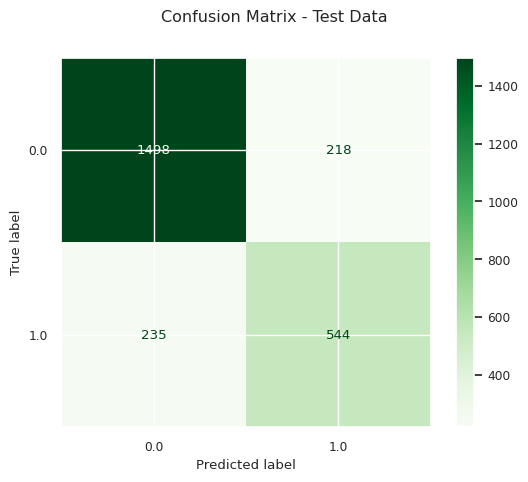

In [553]:
# Create confusion matrices for test data
ConfusionMatrixDisplay.from_predictions(y_test, knn_test_predictions,
                cmap='Greens')
plt.suptitle('Confusion Matrix - Test Data');

The model correctly identifies a good number of true positives (544) and true negatives (1498). However, there are false positives (218) and false negatives (235). Based on that the model will have to be tuned to reduce the number of false positives and false negatives.

#### ***Tune Hyperparameters***

In [554]:
# Looking at options for tuning this model
knn_pipeline.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler())]),
                                    ['CREDIT_SCORE', 'VEHICLE_OWNERSHIP',
                                     'MARRIED', 'CHILDREN', 'ANNUAL_MILEAGE',
                                     'SPEEDING_VIOLATIONS', 'DUIS',
                                     'PAST_ACCIDENTS']),
                                   ('nominal',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False)),
                                                    ('standardscaler',
                                                     StandardS...
                                   ('ordinal'

In [555]:
# Define a dictionary of hyperparameters to search over
hyperparameters = {'kneighborsclassifier__n_neighbors': range(1,5, 15),
                   'kneighborsclassifier__weights': ['distance', 'uniform']}

# Create a GridSearchCV object
knn_grid_search = GridSearchCV(estimator=knn_pipeline, param_grid=hyperparameters)

# Fit the grid search to  training data
knn_grid_search.fit(X_train, y_train)

knn_best_params = knn_grid_search.best_params_
print("KNN Best Hyperparameters:", knn_best_params)

KNN Best Hyperparameters: {'kneighborsclassifier__n_neighbors': 1, 'kneighborsclassifier__weights': 'distance'}


In [556]:
# Get the best model
KNN_best_model = knn_grid_search.best_estimator_

In [557]:
# Evaluate the best model on the test data
y_pred_knn = KNN_best_model.predict(X_test)
KNN_test_accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Test Accuracy:", KNN_test_accuracy)

KNN Test Accuracy: 0.769939879759519


In [558]:
#accuracy
accknnTuned = accuracy_score(y_test, y_pred_knn)*100
accuracies['KNN Tuned'] = accknnTuned

The original KNN model provided a strong baseline performance with an accuracy of 82%, indicating its ability to make accurate predictions on the test data.
The decrease in accuracy in the hyper-tuned KNN model could mean that the chosen hyperparameters or parameter settings might not be optimal for this  dataset.

####***PCA***

Use the PCA class from scikit-learn to perform PCA on the standardized data.

In [559]:
# Specify the desired explained variance threshold (90%)
desired_variance = 0.90

# Create a PCA instance with the desired explained variance
pca = PCA(n_components=desired_variance)

# Fit PCA to  data
X_train_pca = pca.fit_transform(X_train_tf)
X_test_pca = pca.transform(X_test_tf)

In [560]:
#Fit the model on the training data with PCA
knn_classifier.fit(X_train_pca, y_train)


KNeighborsClassifier()

In [561]:
# Generate predictions for the training dataset using the model
knn_train_predictions_pca = knn_classifier.predict(X_train_pca)

# Generate predictions for the test dataset using the model
knn_test_predictions_pca = knn_classifier.predict(X_test_pca)

In [562]:
#Pring the accuracy scores
accuracytrain_pca = accuracy_score(y_train, knn_train_predictions_pca)
accuracytest_pca = accuracy_score(y_test, knn_test_predictions_pca)
print(f'Train Data with PCA Accuracy: {accuracytrain_pca:.2f}')
print(f'Test Data with PCA Accuracy: {accuracytest_pca:.2f}')

Train Data with PCA Accuracy: 0.86
Test Data with PCA Accuracy: 0.82


In [563]:
#accuracy
accKNN_PCA = accuracy_score(y_test, knn_test_predictions_pca)*100
accuracies['KNN PCA'] = accKNN_PCA

Applying PCA with a 90% variance threshold did not lead to a significant change in model accuracy. The accuracy remained consistent with the original KNN model.

### **Decision Tree Model**

The Decision Tree Classifier section employs a tree-based machine learning algorithm to create a predictive model that partitions data into hierarchical branches, making it suitable for classification tasks. It focuses on training, optimizing, and assessing Decision Tree models for classifying categorical or binary outcomes.

#### ***Fit Decision Tree Model***

In [564]:
# Instantiate a default decision tree
dec_tree = DecisionTreeClassifier(random_state = 42)
# Fit the model on the training data
dec_tree_Pipe = make_pipeline(col_transformer, dec_tree)

dec_tree_Pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['CREDIT_SCORE',
                                                   'VEHICLE_OWNERSHIP',
                                                   'MARRIED', 'CHILDREN',
                                                   'ANNUAL_MILEAGE',
                                                   'SPEEDING_VIOLATIONS',
                                                   'DUIS', 'PAST_ACCIDENTS']),
                                                 ('nominal',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_outpu...
                                                                   OrdinalEncoder(categories=[['16-25',
                                                                                               '26-39',
                                                                                               '40-64',
                                                                                               '65+'],
                                                                                              ['0-9y',
                                                                                               '10-19y',
                                                                                               '20-29y',
                                                                                               '30y+'],
                                                                                              ['none',
                                                                                               'high '
                                                                                               'school',
                                                                                               'university'],
                                                                                              ['poverty',
                                                                                               'working '
                                                                                               'class',
                                                                                               'middle '
                                                                                               'class',
                                                                                               'upper '
                                                                                               'class']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['AGE', 'DRIVING_EXPERIENCE',
                                                   'EDUCATION', 'INCOME'])],
                                   verbose_feature_names_out=False)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

#### ***Evaluate Decision Tree Model***

In [565]:
# Generate predictions for the training and test dataset using the model and print the classification report
train_preds = dec_tree_Pipe.predict(X_train)
test_preds = dec_tree_Pipe.predict(X_test)

print('Decion Tree Classification Report for Training Data')
print(classification_report(y_train, train_preds))

print('Decion Tree Classification Report for Training Data')
print(classification_report(y_test, test_preds))

Decion Tree Classification Report for Training Data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5146
         1.0       1.00      1.00      1.00      2339

    accuracy                           1.00      7485
   macro avg       1.00      1.00      1.00      7485
weighted avg       1.00      1.00      1.00      7485

Decion Tree Classification Report for Training Data
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85      1716
         1.0       0.66      0.67      0.67       779

    accuracy                           0.79      2495
   macro avg       0.76      0.76      0.76      2495
weighted avg       0.79      0.79      0.79      2495



In [566]:
#Pring the accuracy scores
dcaccuracytrain = accuracy_score(y_train, train_preds)
dcaccuracytest = accuracy_score(y_test, test_preds)
print(f'Train Data Accuracy: {dcaccuracytrain:.2f}')
print(f'Test Data Accuracy: {dcaccuracytest:.2f}')

Train Data Accuracy: 1.00
Test Data Accuracy: 0.79


In [567]:
#accuracy
accDT = accuracy_score(y_test, test_preds)*100
accuracies['Decision Tree'] = accDT

The model appears to overfit the data on training data, achieving perfect classification, with precision and recall of 1.00 for both classes (0 and 1), resulting in a perfect F1-score of 1.00 for each class. However, this level of performance may not generalize well to unseen data. On the test data, the model's performance drops, with class 1 (claimed for insurance) showing lower precision and recall. This could mean that the model may have difficulty correctly identifying insurance claims with real data.

Furthermore, an accuracy of 1.00 on the training data could mean that the  model is overfitting on the training data,  but it is not able to generalize well to unseen data, as the accuracy drops to 0.79 on test data.

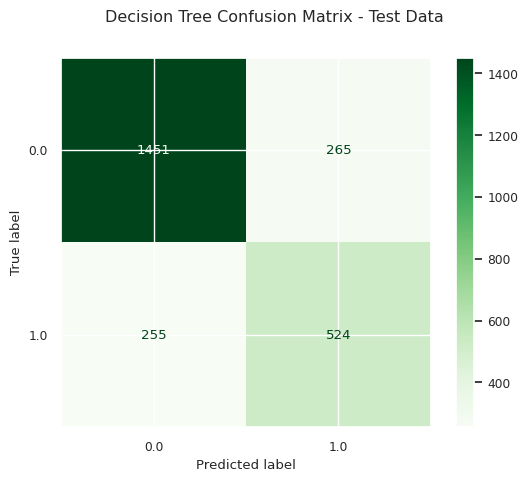

In [568]:
# Create confusion matrix for test data
ConfusionMatrixDisplay.from_predictions(y_test, test_preds,
                cmap='Greens')
plt.suptitle('Decision Tree Confusion Matrix - Test Data');

- There are 524 true positives, indicating instances where the model correctly predicted "claimed" for insurance (class 1) when it was indeed a claim.
- There are 1451 true negatives, representing instances where the model correctly predicted "not claimed" for insurance (class 0) when there was no claim.
- There are 265 false positives, meaning that the model incorrectly predicted "claimed" for insurance (class 1) when there was no claim (class 0). These represent Type I errors.
- There are 255 false negatives, indicating instances where the model incorrectly predicted "not claimed" for insurance (class 0) when it was a claim (class 1). These represent Type II errors.

#### ***Tune Hyperparameters***

In [569]:
# Looking at options for tuning this model
dec_tree_Pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler())]),
                                    ['CREDIT_SCORE', 'VEHICLE_OWNERSHIP',
                                     'MARRIED', 'CHILDREN', 'ANNUAL_MILEAGE',
                                     'SPEEDING_VIOLATIONS', 'DUIS',
                                     'PAST_ACCIDENTS']),
                                   ('nominal',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False)),
                                                    ('standardscaler',
                                                     StandardS...
                                   ('ordinal'

In [570]:
# Define the hyperparameter grid to search
param_grid = {
    'decisiontreeclassifier__criterion': ['gini', 'entropy'],
    'decisiontreeclassifier__max_depth': [None, 10, 20, 30],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 4]
}
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=dec_tree_Pipe, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__min_samples_leaf': 2, 'decisiontreeclassifier__min_samples_split': 10}


In [571]:
# Get the best model
best_model = grid_search.best_estimator_
print(best_model)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['CREDIT_SCORE',
                                                   'VEHICLE_OWNERSHIP',
                                                   'MARRIED', 'CHILDREN',
                                                   'ANNUAL_MILEAGE',
                                                   'SPEEDING_VIOLATIONS',
                                                   'DUIS', 'PAST_ACCIDENTS']),
                                                 ('nominal',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                          

In [572]:
# Evaluate the best model on the test data
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8300601202404809


Comparing the hyper-tuned Decision Tree model, which achieved a test accuracy of  83%, with the original Decision Tree model, which had a test accuracy of around 79%, reveals the significant impact of hyperparameter tuning on model performance. The hyper-tuned model demonstrates improved accuracy and is better equipped to make accurate predictions on new, unseen data.

#### ***PCA***

Use the PCA class from scikit-learn to perform PCA on the standardized data.

In [573]:
# Specify the desired explained variance threshold (90%)
desired_variance = 0.90

# Create a PCA instance with the desired explained variance
pca = PCA(n_components=desired_variance)

# Fit PCA to  data
X_train_pca = pca.fit_transform(X_train_tf)
X_test_pca = pca.transform(X_test_tf)

In [574]:
#Fit the model on the training data with PCA
dec_tree.fit(X_train_pca, y_train)


DecisionTreeClassifier(random_state=42)

In [575]:
# Generate predictions for the training dataset using the model
dt_train_predictions_pca = dec_tree.predict(X_train_pca)

# Generate predictions for the test dataset using the model
dt_test_predictions_pca = dec_tree.predict(X_test_pca)

In [576]:
#Pring the accuracy scores
accuracytrain_pca = accuracy_score(y_train, dt_train_predictions_pca)
accuracytest_pca = accuracy_score(y_test, dt_test_predictions_pca)
print(f'Train Data with PCA Accuracy: {accuracytrain_pca:.2f}')
print(f'Test Data with PCA Accuracy: {accuracytest_pca:.2f}')

Train Data with PCA Accuracy: 1.00
Test Data with PCA Accuracy: 0.75


In [577]:
#accuracy
accknnPCA = accuracy_score(y_test, dt_test_predictions_pca)*100
accuracies['KNN PCA'] = accknnPCA

The outcome of PCA in this case couls mean that dimensionality reduction did not improve the model's performance. It's possible that PCA led to the loss of  information, resulting in decreased accuracy on the test data.

### **Random Forest**

#### ***Fit Random Forest Model***

In [578]:
# Instantiate a default logistic regression
RF = RandomForestClassifier(random_state = 42)
# Fit the model on the training data
RF_Pipe = make_pipeline(col_transformer, RF)

RF_Pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['CREDIT_SCORE',
                                                   'VEHICLE_OWNERSHIP',
                                                   'MARRIED', 'CHILDREN',
                                                   'ANNUAL_MILEAGE',
                                                   'SPEEDING_VIOLATIONS',
                                                   'DUIS', 'PAST_ACCIDENTS']),
                                                 ('nominal',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_outpu...
                                                                   OrdinalEncoder(categories=[['16-25',
                                                                                               '26-39',
                                                                                               '40-64',
                                                                                               '65+'],
                                                                                              ['0-9y',
                                                                                               '10-19y',
                                                                                               '20-29y',
                                                                                               '30y+'],
                                                                                              ['none',
                                                                                               'high '
                                                                                               'school',
                                                                                               'university'],
                                                                                              ['poverty',
                                                                                               'working '
                                                                                               'class',
                                                                                               'middle '
                                                                                               'class',
                                                                                               'upper '
                                                                                               'class']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['AGE', 'DRIVING_EXPERIENCE',
                                                   'EDUCATION', 'INCOME'])],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

#### ***Evaluate Random Forest***

In [579]:
# Generate predictions for the training and test dataset using the model and print the classification report
train_preds_RF = RF_Pipe.predict(X_train)
test_preds_RF = RF_Pipe.predict(X_test)

print('Random Forest Classification Report for Training Data')
print(classification_report(y_train, train_preds_RF))

print('Random Forest Classification Report for Training Data')
print(classification_report(y_test, test_preds_RF))

Random Forest Classification Report for Training Data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5146
         1.0       1.00      1.00      1.00      2339

    accuracy                           1.00      7485
   macro avg       1.00      1.00      1.00      7485
weighted avg       1.00      1.00      1.00      7485

Random Forest Classification Report for Training Data
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88      1716
         1.0       0.77      0.70      0.73       779

    accuracy                           0.84      2495
   macro avg       0.82      0.80      0.81      2495
weighted avg       0.84      0.84      0.84      2495



In [580]:
#Pring the accuracy scores
rfaccuracytrain = accuracy_score(y_train, train_preds_RF)
rfaccuracytest = accuracy_score(y_test, test_preds_RF)
print(f'Random Forest Train Data Accuracy: {rfaccuracytrain:.2f}')
print(f'Random Forest Test Data Accuracy: {rfaccuracytest:.2f}')

Random Forest Train Data Accuracy: 1.00
Random Forest Test Data Accuracy: 0.84


In [581]:
#accuracy
accRF = accuracy_score(y_test, test_preds_RF)*100
accuracies['Random Forest'] = accRF

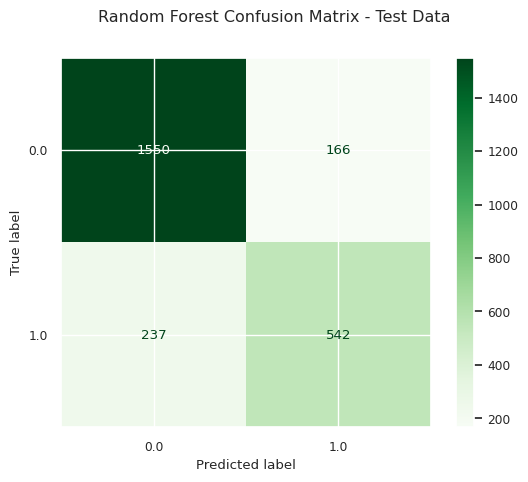

In [583]:
# Create confusion matrix for test data
ConfusionMatrixDisplay.from_predictions(y_test, test_preds_RF,
                cmap='Greens')
plt.suptitle('Random Forest Confusion Matrix - Test Data');

#### ***Tune Hyperparameters***

In [584]:
# Retrieve and display the model's hyperparameters
RF_hyperparameters = RF_Pipe.get_params()
RF_hyperparameters

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler())]),
                                    ['CREDIT_SCORE', 'VEHICLE_OWNERSHIP',
                                     'MARRIED', 'CHILDREN', 'ANNUAL_MILEAGE',
                                     'SPEEDING_VIOLATIONS', 'DUIS',
                                     'PAST_ACCIDENTS']),
                                   ('nominal',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False)),
                                                    ('standardscaler',
                                                     StandardS...
                                   ('ordinal'

In [485]:
# Define a dictionary of hyperparameters to search over
param_grid = {
    'randomforestclassifier__n_estimators': [10, 50, 100],
    'randomforestclassifier__max_depth': [None, 10, 20, 30],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
RF_grid_search = GridSearchCV(estimator=RF_Pipe, param_grid=param_grid)

# Fit the grid search to training data
RF_grid_search.fit(X_train, y_train)

best_params = RF_grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 10, 'randomforestclassifier__n_estimators': 50}


In [486]:
# Get the best estimator (tuned model)
best_model_rf = RF_grid_search.best_estimator_
best_model_rf

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['CREDIT_SCORE',
                                                   'VEHICLE_OWNERSHIP',
                                                   'MARRIED', 'CHILDREN',
                                                   'ANNUAL_MILEAGE',
                                                   'SPEEDING_VIOLATIONS',
                                                   'DUIS', 'PAST_ACCIDENTS']),
                                                 ('nominal',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_outpu...
                                                                                               '30y+'],
                                                                                              ['none',
                                                                                               'high '
                                                                                               'school',
                                                                                               'university'],
                                                                                              ['poverty',
                                                                                               'working '
                                                                                               'class',
                                                                                               'middle '
                                                                                               'class',
                                                                                               'upper '
                                                                                               'class']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['AGE', 'DRIVING_EXPERIENCE',
                                                   'EDUCATION', 'INCOME'])],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=10, min_samples_split=10,
                                        n_estimators=50, random_state=42))])

In [487]:
# Evaluate the best model on the test data
y_pred_rf = best_model_rf.predict(X_test)
rf_test_accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Test Accuracy: {rf_test_accuracy:.2f}')

Test Accuracy: 0.85


In [591]:
print('Decion Tree Classification Report for Training Data')
print(classification_report(y_test, y_pred_rf))

Decion Tree Classification Report for Training Data
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.89      1716
         1.0       0.77      0.74      0.75       779

    accuracy                           0.85      2495
   macro avg       0.83      0.82      0.82      2495
weighted avg       0.85      0.85      0.85      2495



In [488]:
#accuracy
accRF_Tuned = accuracy_score(y_test, y_pred_rf)*100
accuracies['Random Forest Tuned'] = accRF_Tuned

#### ***PCA***

In [489]:
# Specify the desired explained variance threshold (90%)
desired_variance = 0.90

# Create a PCA instance with the desired explained variance
pca = PCA(n_components=desired_variance)

# Fit PCA to  data
X_train_pca = pca.fit_transform(X_train_tf)
X_test_pca = pca.transform(X_test_tf)

In [490]:
#Fit the model on the training data with PCA
RF.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=42)

In [491]:
# Generate predictions for the training dataset using the model
rf_train_predictions_pca = RF.predict(X_train_pca)

# Generate predictions for the test dataset using the model
rf_test_predictions_pca = RF.predict(X_test_pca)

In [492]:
#Pring the accuracy scores
accuracytrain_pca_rf = accuracy_score(y_train, rf_train_predictions_pca)
accuracytest_pca_rf = accuracy_score(y_test, rf_test_predictions_pca)
print(f'Train Data with PCA Accuracy: {accuracytrain_pca_rf:.2f}')
print(f'Test Data with PCA Accuracy: {accuracytest_pca_rf:.2f}')

Train Data with PCA Accuracy: 1.00
Test Data with PCA Accuracy: 0.82


In [493]:
#accuracy
accRF_pca = accuracy_score(y_test, rf_test_predictions_pca)*100
accuracies['Random Forest PCA'] = accRF_pca

The Random Forest model with PCA, while maintaining a high training accuracy, had a small drop in accuracy on the test data. This could mean that PCA may have led to the loss of some information for classification.


### **Selecting the Production Model**

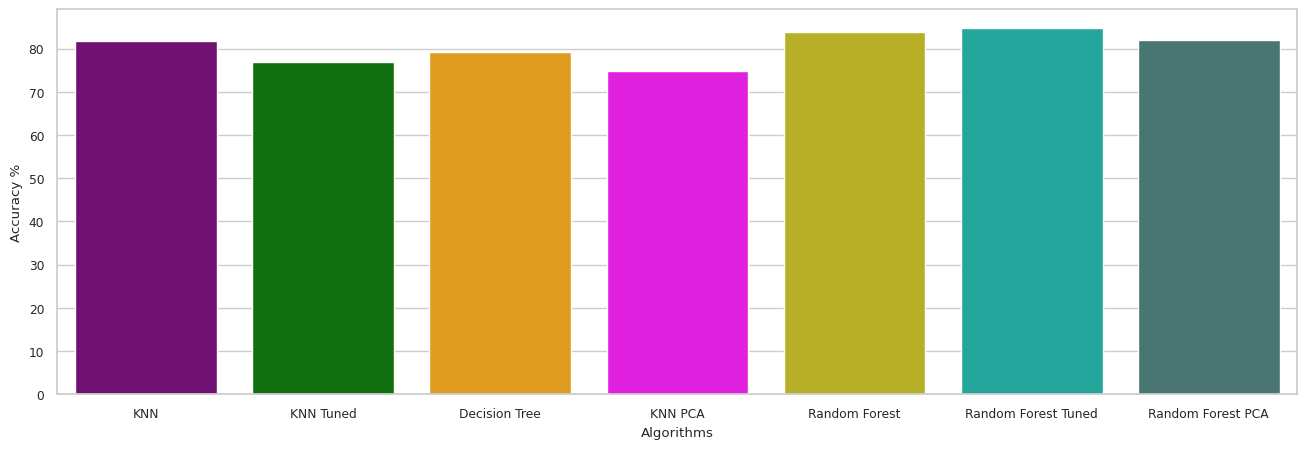

In [494]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE",'#417D7A','#066163','#4D4C7D']

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

The primary objective for the insurance company is to correctly identify clients who are likely to make claims (class 1) while avoiding unnecessary payments to clients who do not make claims (class 0). This is where precision plays a crucial role.


Precision for class 1 is a key metric for this business problem. The Tuned Random Forest Model has a high precision of  77% for predicting claims. This means that when the model predicts a client is likely to claim, it is correct  77% of the time. High precision is important for minimizing the incorrect prediction of claims, which can result in unnecessary payouts and financial losses.

Therefore, based on these metrics, the Random Forest model with tuned hyperparameters outperforms the other models in terms of precision for class 1.It has the highest accuracy (85%) among all the models, which means it correctly predicts the likelihood of clients claiming or not claiming insurance the most accurately.